In [1]:
# 1️⃣ Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

In [2]:
# 2️⃣ Load CSV files
train = pd.read_csv("datasets/mnist_train.csv")
test  = pd.read_csv("datasets/mnist_test.csv")

In [3]:
# 3. Prepare data
X_train = train.drop('label', axis=1).to_numpy().astype('float32') / 255.0
X_test  = test.drop('label', axis=1).to_numpy().astype('float32') / 255.0
y_train = to_categorical(train['label'].to_numpy(), 10)
y_test  = to_categorical(test['label'].to_numpy(), 10)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (60000, 784) Test shape: (10000, 784)


In [4]:
# 4. Build a simple but strong MLP
model = Sequential([
    Input(shape=(784,)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
#model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 5️⃣ Train model (11 epochs)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=11, batch_size=128,verbose=2)

Epoch 1/11
469/469 - 4s - 10ms/step - accuracy: 0.8494 - loss: 0.5026 - val_accuracy: 0.9364 - val_loss: 0.2198
Epoch 2/11
469/469 - 4s - 8ms/step - accuracy: 0.9320 - loss: 0.2331 - val_accuracy: 0.9549 - val_loss: 0.1549
Epoch 3/11
469/469 - 3s - 6ms/step - accuracy: 0.9485 - loss: 0.1760 - val_accuracy: 0.9622 - val_loss: 0.1226
Epoch 4/11
469/469 - 4s - 8ms/step - accuracy: 0.9576 - loss: 0.1431 - val_accuracy: 0.9658 - val_loss: 0.1078
Epoch 5/11
469/469 - 4s - 8ms/step - accuracy: 0.9635 - loss: 0.1210 - val_accuracy: 0.9704 - val_loss: 0.0928
Epoch 6/11
469/469 - 5s - 10ms/step - accuracy: 0.9684 - loss: 0.1065 - val_accuracy: 0.9733 - val_loss: 0.0847
Epoch 7/11
469/469 - 5s - 11ms/step - accuracy: 0.9715 - loss: 0.0961 - val_accuracy: 0.9764 - val_loss: 0.0781
Epoch 8/11
469/469 - 5s - 11ms/step - accuracy: 0.9733 - loss: 0.0874 - val_accuracy: 0.9767 - val_loss: 0.0739
Epoch 9/11
469/469 - 5s - 11ms/step - accuracy: 0.9767 - loss: 0.0775 - val_accuracy: 0.9774 - val_loss: 0.0

In [6]:
# 6️⃣ Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.0794
Test Loss: 0.0660
Test Accuracy: 97.82%


In [1]:
# 7️⃣ Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))


NameError: name 'np' is not defined

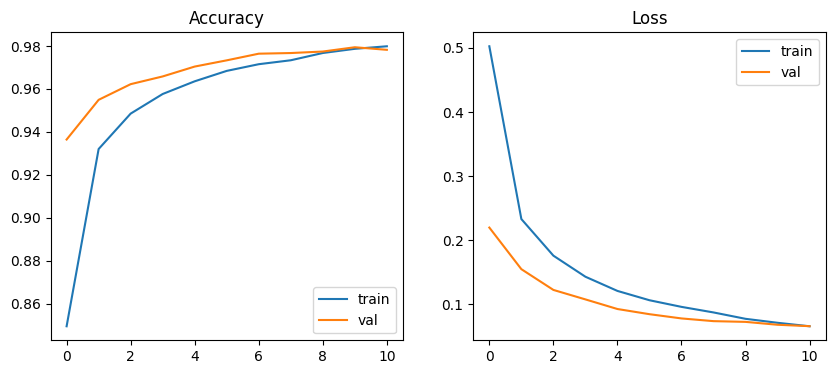

In [8]:
# 8️⃣ Plot training accuracy & loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss"); plt.legend()
plt.show()